# 手写神经网络
参考：
https://www.baidu.com/link?url=rMtf5-Y8b5RwZQwzEbO3z9Rd9J6gMuJr-nQRr9IBIHu-o4qKlqmzYGN1GZX6U-Z-BfIP8z3CicpH1T8ZObkvh022TeyDyKftJUjukTTzIhW&wd=&eqid=851bf38f0002715e00000006602a4968

In [1]:
import numpy as np
import copy

- 先试试

$$
y = x_1 *(1 + x_2)
$$


- foward propagating

In [2]:
# activagte funtion
def ReLU(x):
    return np.maximum(0,x)
def sigmoid(x):
    return 1/(1+np.exp(-1*x))

def loss_SR(pre,true):
    return pre - true
# 前向传播

def fp_calc(X):
    import copy
    global W1,B1,W2,B2,W3,B3,STO
    inp = X
    for i in range(1,3+1):#3 layers
        layer_name = str(i)
        W_temp = eval('W'+str(i))
        B_temp = eval('B'+str(i))
        linear_out = W_temp@inp+B_temp# W * X + B 
        
        STO['inp'+layer_name] = copy.deepcopy(inp)#STO = {}
        STO['W'+layer_name] = copy.deepcopy(W_temp)#storage
        STO['B'+layer_name] = copy.deepcopy(B_temp)
        STO['linear_out'+layer_name] = copy.deepcopy(linear_out)
        
        inp = ReLU(linear_out)# the layer out is exactly the input of next layer
    
    return inp

In [3]:
def fp(X,true):
    e = loss_SR(fp_calc(X),true)
    return e

- back propagating
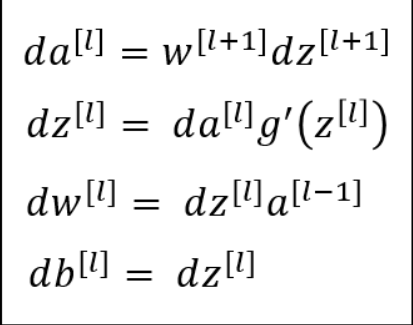

In [7]:
'''
inp = layerout
relu_inp = linear_out
'''
def relu_bp(d_layerout,relu_inp):
    '''calc the d(relu_inp) by d_lout and relu_inp '''
    return d_layerout*(np.int64(relu_inp > 0))

def linear_bp(d_linear_out,layer_name):
    '''calc the dinp.dw.db with the d(linear out) and the W,B,INP,Linear_out
    the dinp is exactly the d_layeout
    '''
    global STO
    inp = STO['inp'+layer_name]
    W = STO['W'+layer_name]
    B = STO['B' + layer_name]
    linear_out = STO['linear_out'+layer_name]
    
    dw = np.dot(d_linear_out,inp.T)
    db = np.sum(d_linear_out,axis=1,keepdims=True)
    dinp = np.dot(W.T,d_linear_out)
    
    return dinp,dw,db


In [8]:

# e = loss_SR(fp_calc(),true)
#e,STO
def bp(e,true):
    d_layerout = e
#     print(e,d_layerout)
    for i in reversed(range(1,3+1)):
        layer_name = str(i)
        d_linear_out = relu_bp(d_layerout,STO['linear_out'+layer_name])

        d_layerout,dw,db = linear_bp(d_linear_out,layer_name)
        STO['dw'+layer_name] = copy.deepcopy(dw)
        STO['db'+layer_name] = copy.deepcopy(db)


- upgrade the paras

In [9]:
def setValue(v_name,value):
    '''set a value by it's name '''
    print(v_name,value)
    exec(v_name + ' = value')
    
def upgrade_paras():
    '''upgrade the paras in the nets'''
    lr = 0.01

    global W1,B1,W2,B2,W3,B3,STO
    W1 = W1 - lr*(STO['dw1'])
    B1 = B1 - lr*(STO['db1'])


    W2 = W2 - lr*(STO['dw2'])
    B2 = B2 - lr*(STO['db2'])

    W3 = W3 - lr*(STO['dw3'])
    B3 = B3 - lr*(STO['db3'])

    #change the paras initialization part for normal situation
    # the key is  We cannot change the value with 'name'

    # for i in range(1,3+1):
    #     layer_name = str(i)
    #     W = eval('W'+layer_name)
    #     B = eval('B'+layer_name)
    #     setValue('W'+layer_name,W - lr*(STO['dw'+layer_name]))
    #     setValue('B'+layer_name,W - lr*(STO['db'+layer_name]))

In [10]:
def oneTime(X,true):
    '''one time loop, including forward propagating and back propagating'''
    e = fp(X,true)
    bp(e,true)
    upgrade_paras()
    return e
def itera(X,true,iterTimes = 100):
    '''each iteration include some loops'''
    for i in range(iterTimes):
        e = oneTime(X,true)
    return e
def predict(X):
    return fp_calc(X)

- try try
- build dataset

In [17]:
train_data = np.random.rand(1000,3)

train_data[:,2] = train_data[:,0] *(1+ (train_data[:,1]))
# y = x1*(1+x2)

In [18]:
def random_choice(train_data):
    '''choose random data from dataset into training'''
    choice = np.random.choice(list(range(len(train_data))))
    X = train_data[choice,:2].reshape(-1,1)
    true = train_data[choice,2:].reshape(-1,1)
    return X,true

In [31]:
# build the net
#y = W*X + B
W1 = np.random.rand(2,2)
B1 = np.random.rand(2,1)

W2 = np.random.rand(3,2)
B2 = np.random.rand(3,1)

W3 = np.random.rand(1,3)
B3 = np.random.rand(1,1)

In [32]:
STO = {}#STO is the global Storage
loss_data = []
for i in range(1,400):
    print('I',end='')
    X,true = random_choice(train_data)
    
    loss_data.append(oneTime(X,true)[0][0])

IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [33]:
import matplotlib.pyplot as plt

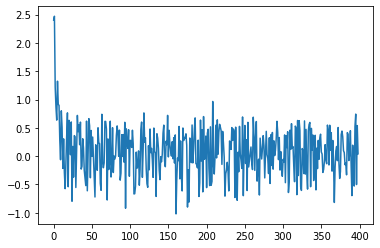

In [34]:
plt.plot(loss_data)#plot the loss

In [35]:
predict(X)

array([[0.61650818]])

In [36]:
X

array([[0.54738343],
       [0.05956844]])

# Encapsulation

In [74]:
class DNN_simple():
    def __init__(self,lr = 0.01):
        import numpy as np
        self.W1 = np.random.rand(2,2)
        self.B1 = np.random.rand(2,1)
        self.W2 = np.random.rand(3,2)
        self.B2 = np.random.rand(3,1)
        self.W3 = np.random.rand(1,3)
        self.B3 = np.random.rand(1,1)
        self.lr = 0.01
    def draw_loss(self):
        import matplotlib.pyplot as plt
        try:
            plt.plot(self.loss_data)#plot the loss
        except:
            print('Error: not trained or sth else')
    def fit(self,X):
        '''fit the model with gived data'''
        self.train_data = train_data
    def train(self,iterTimes = 100):
        self.STO = {}#STO is the global Storage
        loss_data = []
        for i in range(1,200):
            print('I',end='')
            X,true = self.random_choice(self.train_data)
            loss_data.append(self.itera(X,true,iterTimes)[0][0])
        self.loss_data = loss_data

    def oneTime(self,X,true):
        '''one time loop, including forward propagating and back propagating'''
        e = self.fp(X,true)
        self.bp(e,true)
        self.upgrade_paras()
        return e
    def random_choice(self,train_data):
#     '''choose random data from dataset into training'''
        choice = np.random.choice(list(range(len(train_data))))
        X = train_data[choice,:2].reshape(-1,1)
        true = train_data[choice,2:].reshape(-1,1)
        return X,true
    def itera(self,X,true,iterTimes = 100):
        '''each iteration include some loops'''
        for i in range(iterTimes):
            e = self.oneTime(X,true)
        return e

    
    def predict(self,X):
        return self.fp_calc(X)
    
    
    #==========================fp=======================
    def loss_SR(self,pre,true):
        return pre - true
    # 前向传播

    def fp_calc(self,X):
        import copy
        
        inp = X
        for i in range(1,3+1):#3 layers
            layer_name = str(i)
            W_temp = eval('self.W'+str(i))
            B_temp = eval('self.B'+str(i))
            linear_out = W_temp@inp+B_temp# W * X + B 

            self.STO['inp'+layer_name] = copy.deepcopy(inp)#STO = {}
            self.STO['W'+layer_name] = copy.deepcopy(W_temp)#storage
            self.STO['B'+layer_name] = copy.deepcopy(B_temp)
            self.STO['linear_out'+layer_name] = copy.deepcopy(linear_out)

            inp = (linear_out)# the layer out is exactly the input of next layer

        return inp
    
    
        # activate funtion
    def ReLU(self,x):
        return np.maximum(0,x)
    def sigmoid(self,x):
        return 1/(1+np.exp(-1*x))
    def fp(self,X,true):
        e = self.loss_SR(self.fp_calc(X),true)
        return e
    

    
    
    
    
    #==============================bp==============================
    
    '''
    inp = layerout
    relu_inp = linear_out
    '''
    def relu_bp(self,d_layerout,relu_inp):
        '''calc the d(relu_inp) by d_lout and relu_inp '''
        return d_layerout*(np.int64(relu_inp > 0))

    def linear_bp(self,d_linear_out,layer_name):
        '''calc the dinp.dw.db with the d(linear out) and the W,B,INP,Linear_out
        the dinp is exactly the d_layeout
        '''
#         global STO
        STO = self.STO
        inp = STO['inp'+layer_name]
        W = STO['W'+layer_name]
        B = STO['B' + layer_name]
        linear_out = STO['linear_out'+layer_name]

        dw = np.dot(d_linear_out,inp.T)
        db = np.sum(d_linear_out,axis=1,keepdims=True)
        dinp = np.dot(W.T,d_linear_out)

        return dinp,dw,db

    
    # e = loss_SR(fp_calc(),true)
    #e,STO
    def bp(self,e,true):
        d_layerout = e
    #     print(e,d_layerout)
        for i in reversed(range(1,3+1)):
            layer_name = str(i)
            d_linear_out = self.relu_bp(d_layerout,self.STO['linear_out'+layer_name])

            d_layerout,dw,db = self.linear_bp(d_linear_out,layer_name)
            self.STO['dw'+layer_name] = copy.deepcopy(dw)
            self.STO['db'+layer_name] = copy.deepcopy(db)

            
#===============================upgrade paras=====
    def upgrade_paras(self):
        '''upgrade the paras in the nets'''
        
        lr = self.lr
        STO = self.STO
#         global W1,B1,W2,B2,W3,B3,STO
        self.W1 = self.W1 - lr*(STO['dw1'])
        self.B1 = self.B1 - lr*(STO['db1'])


        self.W2 = self.W2 - lr*(STO['dw2'])
        self.B2 = self.B2 - lr*(STO['db2'])

        self.W3 = self.W3 - lr*(STO['dw3'])
        self.B3 = self.B3 - lr*(STO['db3'])

        #change the paras initialization part for normal situation
        # the key is  We cannot change the value with 'name'

        # for i in range(1,3+1):
        #     layer_name = str(i)
        #     W = eval('W'+layer_name)
        #     B = eval('B'+layer_name)
        #     setValue('W'+layer_name,W - lr*(STO['dw'+layer_name]))
        #     setValue('B'+layer_name,W - lr*(STO['db'+layer_name]))

In [75]:
dnn = DNN_simple()

In [76]:
dnn.fit(train_data)

In [77]:
dnn.train()

IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

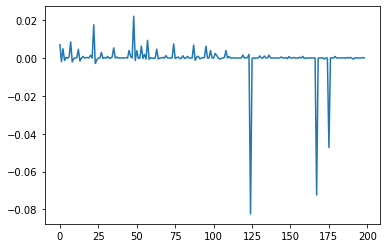

In [78]:
dnn.draw_loss()

In [81]:
dnn.predict(np.array([1,2]))

array([[0.81917673, 3.11118449]])

In [73]:
np.array([1,2])

array([1, 2])